In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random

## 4 Basic Visualizations

Load in each data file:

In [5]:
data = np.loadtxt('data/data.txt', skiprows=0, delimiter='\t', dtype='int')
test = np.loadtxt('data/test.txt', skiprows=0, delimiter='\t', dtype='int')
train = np.loadtxt('data/train.txt', skiprows=0, delimiter='\t', dtype='int')
movies = np.loadtxt('data/movies.txt', skiprows=0, delimiter='\t', dtype='str')

### 1

Create a histogram of all the ratings in the dataset. First, put all the ratings into a list and then plot. 

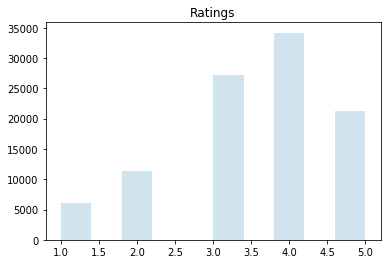

In [6]:
ratings = []
for element in data:
    ratings.append(int(element[2]))

plt.hist(ratings, normed=False, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings')
plt.show()

### 2

First, we will determine the 10 most popular movies. To do this, we will go through the dataset and determine the number of ratings that each movie has received

In [7]:
totalRatings = {}
for element in data:
    if element[1] in totalRatings:
        totalRatings[element[1]] += 1
    else:
        totalRatings[element[1]] = 1

Now, convert the dictionary to a list and sort by the number of ratings:

In [8]:
ratingList = []

for item in totalRatings.items():
    ratingList.append(item)
    
ratingList.sort(key=lambda x: x[1], reverse=True)

Print out the 10 most popular movies:

In [9]:
ratingList[:10]

[(50, 583),
 (258, 509),
 (100, 508),
 (181, 507),
 (294, 485),
 (286, 481),
 (288, 478),
 (1, 452),
 (300, 431),
 (121, 429)]

Create a dictionary for the ten most popular movies, find all the ratings, and plot as a histogram:

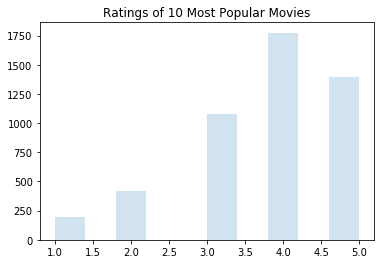

In [10]:
popular = {}
for item in ratingList[:10]:
    popular[item[0]] = True
    
popularRatings = []
for element in data:
    if element[1] in popular:
        popularRatings.append(int(element[2]))

plt.hist(popularRatings, normed=False, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings of 10 Most Popular Movies')
plt.show()

### 3

Find the average ratings of each movie and sort a list by the best rated:

In [11]:
avgRatings = {}
for element in data:
    if element[1] in avgRatings:
        avgRatings[element[1]][0] += int(element[2])
        avgRatings[element[1]][1] += 1
    else:
        avgRatings[element[1]] = [int(element[2]), 1]

        
avgRatingList = []

for key, value in avgRatings.items():
    avgRatingList.append((key, value[0] / float(value[1]), value[1]))
    
avgRatingList.sort(key=lambda x: x[1], reverse=True)

Print out the 10 best rated movies:

In [12]:
avgRatingList[:10]

[(1189, 5.0, 3),
 (1500, 5.0, 2),
 (814, 5.0, 1),
 (1536, 5.0, 1),
 (1293, 5.0, 3),
 (1599, 5.0, 1),
 (1653, 5.0, 1),
 (1467, 5.0, 2),
 (1122, 5.0, 1),
 (1201, 5.0, 1)]

Create a dictionary for the ten best rated movies, find all the ratings, and plot as a histogram:

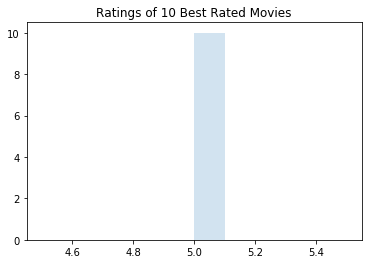

In [13]:
best = {}
for item in avgRatingList[:10]:
    best[item[0]] = True
    
bestRatings = []
for element in data:
    if element[1] in best:
        bestRatings.append(int(element[2]))

plt.hist(bestRatings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings of 10 Best Rated Movies')
plt.show()

### 4

We choose to do the genres Comedy, Western, and Romance.

In [14]:
print(movies[0])

['1' 'Toy Story (1995)' '0' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0']


Find all the movies that are comedy, western, and/or romance:

In [15]:
genres = {'Comedy':[], 'Western':[], 'Animation':[]}
for movie in movies:
    if movie[7] == '1':
        genres['Comedy'].append(int(movie[0]))
    if movie[20] == '1':
        genres['Western'].append(int(movie[0]))
    if movie[16] == '1':
        genres['Animation'].append(int(movie[0]))

For the movies in each category, find all the ratings and plot a histogram:

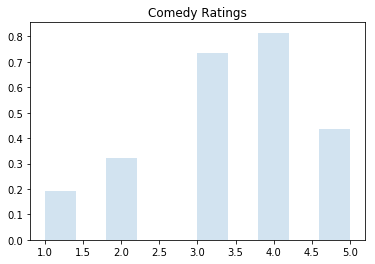

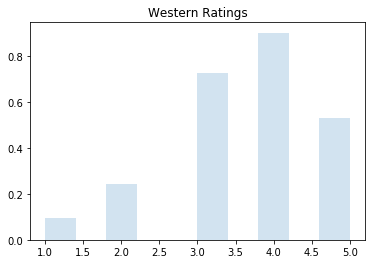

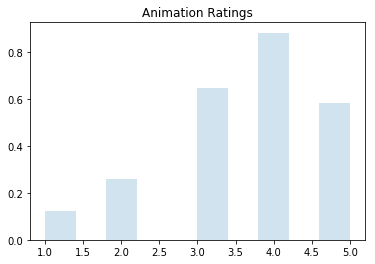

In [16]:
for genre in genres.keys():
    genre_ratings = []
    temp = genres[genre]
    for element in data:
        if element[1] in temp:
            genre_ratings.append(int(element[2]))
    title = genre + ' Ratings'
    plt.hist(genre_ratings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
    plt.title(title)
    plt.show()

### 5 Matrix Factorization Visualizations

### Part 1

Below is my code from Homework 5:

In [72]:
import numpy as np

def grad_U(Ui, Yij, Vj, reg, eta, Ai, Bj):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta * (reg * Ui - Vj * (Yij - np.dot(Ui, Vj) - Ai - Bj))

def grad_V(Vj, Yij, Ui, reg, eta, Ai, Bj):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta * (reg * Vj - Ui * (Yij - np.dot(Ui, Vj) - Ai - Bj))
                  
def grad_AB(Vj, Yij, Ui, reg, eta, Ai, Bj):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta * -(Yij - np.dot(Ui, Vj) - Ai - Bj)

def grad_B(Vj, Yij, Ui, reg, eta, Ai, Bj):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta * -(Yij - np.dot(Ui, Vj) - Ai - Bj)

def get_err(U, V, Y, A, B, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    err = 0.0
    for i in range(len(Y)):
        est = np.dot(U[Y[i][0] - 1], np.transpose(V[Y[i][1] - 1]))
        err += .5 * (Y[i][2] - est - A[Y[i][0] - 1] - B[Y[i][1] - 1]) ** 2

    err += reg / 2 * (np.linalg.norm(U) ** 2 + np.linalg.norm(V) ** 2)
    return err / len(Y)

def train_model(M, N, K, eta, reg, Y,  A, B, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    U = np.zeros((M, K))
    V = np.zeros((N, K))
    # initialize a & b to zero

    for j in range(K):
        for i in range(M):
            U[i][j] = random.uniform(-0.5, 0.5)
        for h in range(N):
            V[h][j] = random.uniform(-0.5, 0.5)
    # print(A[Y[0][0] - 1])
    # print(V)
    err = get_err(U, V, Y, A, B, reg)
    nextErr = 0
    initErr = 0
    for k in range(max_epochs):
        a = list(range(len(Y)))
        random.shuffle(a)
        for i in a:
            U[Y[i][0] - 1] = U[Y[i][0] - 1] - grad_U(U[Y[i][0] - 1], Y[i][2], V[Y[i][1] - 1], reg, eta, A[Y[i][0] - 1], B[Y[i][1] - 1])
            V[Y[i][1] - 1] = V[Y[i][1] - 1] - grad_V(V[Y[i][1] - 1], Y[i][2], U[Y[i][0] - 1], reg, eta, A[Y[i][0] - 1], B[Y[i][1] - 1])
            A[Y[i][0] - 1] = A[Y[i][0] - 1] - grad_AB(V[Y[i][1] - 1], Y[i][2], U[Y[i][0] - 1], reg, eta, A[Y[i][0] - 1], B[Y[i][1] - 1])
            B[Y[i][1] - 1] = B[Y[i][1] - 1] - grad_AB(V[Y[i][1] - 1], Y[i][2], U[Y[i][0] - 1], reg, eta, A[Y[i][0] - 1], B[Y[i][1] - 1])
        
        # print(V)
        nextErr = get_err(U, V, Y, A, B, reg)
        if(k == 0):
            initErr = np.abs(nextErr - err)

        # print(err)
        if abs(nextErr - err) / initErr <= eps:
            break
        err = nextErr
        print("did err", err)
        
    return (U, V, nextErr)

We will use a regularization parameter of $\lambda=0.1$ since this performed best on the test set in the homework. Our stop criteria will be 300 epochs since this is probably enough epochs to converge if the model is able to converge to a particular value, and our other stop condition will be if the change over an epoch is very small relative to the change over the first epoch, which indicates that the model has basically converged.

In [74]:
M = max(max(train[:, 0]), max(test[:, 0])).astype(int)
N = max(max(train[:, 1]), max(test[:, 1])).astype(int)
print("Factorizing with ", M, " users, ", N, " movies.")


reg = 0.0
eta = 0.03

A = np.zeros(M)
B = np.zeros(N)

print(np.shape(A), np.shape(B))
for i in range(M):
    A[i] = random.uniform(-0.5, 0.5)

for i in range(N):
    B[i] = random.uniform(-0.5, 0.5)

U, V, err = train_model(M, N, 20, eta, reg, train, A, B)
eout = get_err(U, V, test, A, B)
print(err, eout)

Factorizing with  943  users,  1682  movies.
(943,) (1682,)
did err 0.4694226551461339
did err 0.3657031721936883
did err 0.3174966711218332
did err 0.2852839925671906
did err 0.26276700319893653
did err 0.24596225323216128
did err 0.23371471709851865
did err 0.22350889884432565
did err 0.21526122258439176
did err 0.20925973198057415
did err 0.20421865110900156
did err 0.1996742054585826
did err 0.19600771985678345
did err 0.19360801125267793
did err 0.19184135297134064
did err 0.18929494610206793
did err 0.1881698531729483
did err 0.1865723835630006
0.18653871549291007 0.6396529844340706


In [65]:
# save the movie names to a file

f = open('data/movieNames.txt','w')
for j in range(len(movies)):
    f.write(movies[j][0] + ' ' + movies[j][1] + '\n')
# f.write('hello world')
f.close()
movies[:, 1]

array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
       'Sliding Doors (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'], dtype='<U83')